In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=3) #출력값 조절

def sigmoid(x):
  y = 1 / (1 + np.exp(-x))
  return y

In [2]:
def Machine(x1, x2,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1):
  
  y1 = sigmoid(x1 * w1_11 + x2 * w1_12 + b1_1)
  y2 = sigmoid(x2 * w1_21 + x2 * w1_22 + b1_2)

  y_hat = sigmoid(y1 * w2_11 + y2 * w2_12 + b2_1)

  return y_hat

In [3]:
def Cost(x1, x2, y,
        w1_11, w1_12, b1_1,
        w1_21, w1_22, b1_2,
        w2_11, w2_12, b2_1):
  
  y_hat = Machine(x1, x2,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1)
  
  loss = np.mean(-y * np.log(y_hat) - ( 1 - y ) * np.log(1 - y_hat))

  return loss

In [5]:
def Learning(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1,
            step):
  current = Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1)
  
  dw1_11 = (Cost(x1, x2, y,
            w1_11 + 0.0001, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1) - current) / 0.0001

  dw1_12 = (Cost(x1, x2, y,
            w1_11, w1_12 + 0.0001, b1_1,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1) - current) / 0.0001

  db1_1 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1 + 0.0001,
            w1_21, w1_22, b1_2,
            w2_11, w2_12, b2_1) - current) / 0.0001

  dw1_21 =  (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21  + 0.0001, w1_22, b1_2,
            w2_11, w2_12, b2_1) - current) / 0.0001
          
  dw1_22 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21 , w1_22 + 0.0001, b1_2,
            w2_11, w2_12, b2_1) - current) / 0.0001

  db1_2 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21 , w1_22, b1_2 + 0.0001,
            w2_11, w2_12, b2_1) - current) / 0.0001

  dw2_11 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21, w1_22, b1_2,
            w2_11 + 0.000, w2_12, b2_1) - current) / 0.0001

  dw2_12 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21 , w1_22, b1_2,
            w2_11, w2_12 + 0.0001, b2_1) - current) / 0.0001

  db2_1 = (Cost(x1, x2, y,
            w1_11, w1_12, b1_1,
            w1_21 , w1_22, b1_2,
            w2_11, w2_12, b2_1 + 0.0001) - current) / 0.0001

  w1_11 = w1_11 - step * dw1_11
  w1_12 = w1_11 - step * dw1_12
  b1_1 = b1_1 - step * db1_1

  w1_21 = w1_21 - step * dw1_21
  w1_22 = w1_21 - step * dw1_22
  b1_2 = b1_2 - step * db1_2

  w2_11 = w2_11 - step * dw2_11
  w2_22 = w2_12 - step * dw2_12
  b2_1 = b2_1 - step * db2_1

  return np.array([w1_11, w1_12, b1_1,
                   w1_21, w1_22, b1_2,
                   w2_11, w2_12, b2_1])

In [6]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Default.csv'
DF =pd.read_csv(url)

DF.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [7]:
x1 = np.array(DF[['balance']].head(2000))
x2 = np.array(DF[['income']].head(2000))

target = DF['default'].head(2000)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(target)
y = encoder.transform(target)

y.shape

(2000,)

In [9]:
w1_11 = 0.001
w1_12 = 0.002
b1_1 = 0.003

w1_21 = 0.004
w1_22 = 0.005
b1_2 = 0.006

w2_11 = 0.007
w2_12 = 0.008
b2_1 = 0.009

In [11]:
%time
cost = np.ones(500)

for i in range(0, 500):

  cost[i] = Cost(x1, x2, y,
                 w1_11, w1_12, b1_1,
                 w1_21, w1_22, b1_2,
                 w2_11, w2_12, b2_1)
  temp = Learning(x1, x2, y,
                 w1_11, w1_12, b1_1,
                 w1_21, w1_22, b1_2,
                 w2_11, w2_12, b2_1,
                  0.05)
  w1_11 = temp[0]
  w1_12 = temp[1]
  b1_1 = temp[2]

  w1_21 = temp[3]
  w1_22 = temp[4]
  b1_2 = temp[5]

  w2_11 = temp[6]
  w2_12 = temp[7]
  b2_1 = temp[8]

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [12]:
print(temp)

[-0.001 -0.001  0.003  0.004  0.004  0.006  0.007  0.008 -2.723]


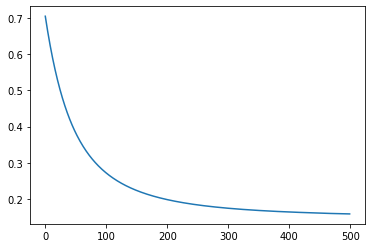

In [13]:
import matplotlib.pyplot as plt

plt.plot(cost)
plt.show()